In [1]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual=[]
        self.convergence = []
        self.optimizer=""
        self.objfname=""
        self.startTime=0
        self.endTime=0
        self.executionTime=0
        self.lb=0
        self.ub=0
        self.dim=0
        self.popnum=0
        self.maxiers=0
        self.no_of_iterations=0

In [2]:
def dis(z,c):
    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sum

In [3]:
def assign_cluster_label(data, centers):
    cluster_labels = []
    for point in data:
        # compute distances between three cluster centers to a data point
        distances = [dis(point, center) for center in centers]
        # find which cluster is closest to the data point and assign the cluster  it
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

In [4]:
def gen_wolf(n_cluster,dim):
    graywolf=[]
    for j in range(n_cluster):
        c=[]
        for i in range(dim):
            ub=x[i].max()
            lb=x[i].min()
            c.append(np.random.uniform(0,1) *(ub-lb)+lb)
        graywolf.append(c)
    return np.array(graywolf)

In [5]:
def init_pop(n_pop,n_cluster,dim):
    init_pop=[]
    for i in range (n_pop):
        #index = np.random.choice(list(range(len(x))), 3)
        z=gen_wolf(n_cluster,dim)
        
        init_pop.append(np.array(z))
    return np.array(init_pop)

In [6]:
from math import sqrt
def dist_f(z,c):

    sum=0
    for i in range(len(z)):
        sum=sum+(z[i]-c[i])**2
    return sqrt(sum)

In [7]:
def fitness(data,Positions,current_labels,i):
    #fitnesses=[]
    
    #for i in range(len(gw)):
        
    bank=0
    for j in range(len(Positions[i])):
        for k in range(len(current_labels)):
                
            if current_labels[k]==j:
                bank =bank + dist_f(data[k],Positions[i][j])
        #fitnesses.append(bank)
        
    return bank

In [9]:
import pandas as pd

df = pd.read_csv('seeds.csv')
points = df.values

In [10]:
points

array([[15.26, 14.84, 0.871, ..., 2.221, 5.22, 'Kama wheat'],
       [14.88, 14.57, 0.8811, ..., 1.018, 4.956, 'Kama wheat'],
       [14.29, 14.09, 0.905, ..., 2.699, 4.825, 'Kama wheat'],
       ...,
       [13.2, 13.66, 0.8883, ..., 8.315, 5.056, 'Canadian wheat'],
       [11.84, 13.21, 0.8521, ..., 3.5980000000000003, 5.044,
        'Canadian wheat'],
       [12.3, 13.34, 0.8684, ..., 5.6370000000000005, 5.063,
        'Canadian wheat']], dtype=object)

In [42]:
seeds=pd.DataFrame(points)

In [61]:
x=points[:,0:7]

In [62]:
x=pd.DataFrame(x)

In [63]:
x

,0,1,2,3,4,5,6
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [66]:
import random
import numpy
import math
#from solution import solution
import time


    

def GWO(Max_iter,SearchAgents_no,n_cluster,dim):
    
   
    ggnn=0
    data=np.array(x)

    levy=np.zeros(SearchAgents_no)
    
    # initialize alpha, beta, and delta_pos
    Alpha_pos=np.zeros((n_cluster,dim))
    Alpha_score=float("inf")
    
    Beta_pos=np.zeros((n_cluster,dim))
    Beta_score=float("inf")
    
    Delta_pos=np.zeros((n_cluster,dim))
    Delta_score=float("inf")
    
    #Initialize the positions of search agents
    Positions=init_pop(SearchAgents_no,n_cluster,dim)
    
    Convergence_curve=numpy.zeros(Max_iter)
    sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    timerStart=time.time() 
    sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    
    
    #sol=solution()

    # Loop counter
    #print("GWO is optimizing  \""+objf.__name__+"\"")    
    
    #timerStart=time.time() 
    #sol.startTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    # Main loop
    for l in range(0,Max_iter):
        for i in range(0,SearchAgents_no):
            
            # Return back the search agents that go beyond the boundaries of the search space
            #Positions[i,:]=numpy.clip(Positions[i,:], lb, ub)

            # Calculate objective function for each search agent
            
            current_centers=pd.DataFrame(Positions[i])
            current_labels = assign_cluster_label(data,Positions[i])
            current_centers.columns=['x','y','z','k','e','p','o']
            fitness1=fitness(data,Positions,current_labels,i)
            
            # Update Alpha, Beta, and Delta
            if fitness1<Alpha_score :
                Alpha_score=fitness1; # Update alpha
                Alpha_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1<Beta_score ):
                Beta_score=fitness1  # Update beta
                Beta_pos=Positions[i,:].copy()
            
            
            if (fitness1>Alpha_score and fitness1>Beta_score and fitness1<Delta_score): 
                Delta_score=fitness1 # Update delta
                Delta_pos=Positions[i,:].copy()
            
        
        #z=numpy.random.uniform()
        #z=4*z*(1-z)
        
        
        a=2-l*((2)/Max_iter); # a decreases linearly fron 2 to 0
        
        beta=0.5
        sigma=(math.gamma(1+beta)*math.sin(math.pi*beta/2)/(math.gamma((1+beta)/2)*beta*2**((beta-1)/2)))**(1/beta);
        
        for i in range(0,SearchAgents_no):
            for j in range (0,n_cluster):     
                           
                r1=random.random() # r1 is a random number in [0,1]
                r2=random.random() # r2 is a random number in [0,1]
                
                A1=2*a*r1-a; # Equation (3.3)
                C1=2*r2; # Equation (3.4)
                
                D_alpha=abs(C1*Alpha_pos[j]-Positions[i,j]); # Equation (3.5)-part 1
                X1=Alpha_pos[j]-A1*D_alpha; # Equation (3.6)-part 1
                           
                r1=random.random()
                r2=random.random()
                
                A2=2*a*r1-a; # Equation (3.3)
                C2=2*r2; # Equation (3.4)
                D_beta=abs(C2*Beta_pos[j]-Positions[i,j]); # Equation (3.5)-part 2
                X2=Beta_pos[j]-A2*D_beta; # Equation (3.6)-part 2
                
                r1=random.random()
                r2=random.random() 
                
                A3=2*a*r1-a; # Equation (3.3)
                C3=2*r2; # Equation (3.4)
                
                D_delta=abs(C3*Delta_pos[j]-Positions[i,j]); # Equation (3.5)-part 3
                X3=Delta_pos[j]-A3*D_delta; # Equation (3.5)-part 3             
                
                Positions[i,j]=(X1+X2+X3)/3  # Equation (3.7)
            
            s=Positions[i,:]
            
            u=numpy.random.uniform(size=dim)*sigma
            v=numpy.random.uniform(size=dim)
            step=u*abs(v)**(1/beta)
            stepsize=0.1*step*(s-Alpha_pos) #s-alpha_pos
            s=s+stepsize*numpy.random.uniform(size=dim)
            Positions[i]=s
        Convergence_curve[l]=Alpha_score

    timerEnd=time.time()  
    sol.endTime=time.strftime("%Y-%m-%d-%H-%M-%S")
    sol.executionTime=timerEnd-timerStart
    sol.convergence=Convergence_curve
    sol.optimizer="GWO"
    
    sol.no_of_iterations=l
    
    
    
    
    print(Alpha_pos)
    return Alpha_pos,current_labels,sol

In [89]:
egwo=GWO(Max_iter=1000,SearchAgents_no=100,n_cluster=3,dim=7)

[[12.38419824 13.05107218  0.73208897  5.12101386  3.49026806  3.91893165
   4.82790919]
 [14.12104321 14.98770051  0.83843847  5.48419502  2.99851672  3.60146512
   5.28593872]
 [18.87661584 16.10704562  0.90932144  6.23991152  3.54663253  3.89758573
   5.88700987]]


In [90]:
current_centers=pd.DataFrame(egwo[0])

In [91]:
current_centers.columns=['x','y','z','k','e','p','o']

In [92]:
current_labels=egwo[1]

In [93]:
data=np.array(x)
data_df = pd.DataFrame(data)
data_df.columns=['x','y','z','k','e','p','o']

In [94]:
data_df

,x,y,z,k,e,p,o
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


Text(0.5, 0, 'y')

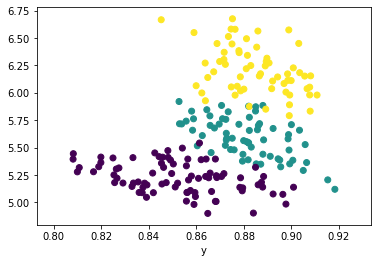

In [101]:
import matplotlib.pyplot as plt
plt.scatter(x='z',y='k',c=current_labels,data=data_df)
#plt.scatter(x='z',y='k',data=current_centers,c=['purple','blue','yellow'],marker='*', s=200)
plt.xlabel("x")
plt.xlabel("y")

In [102]:
x1=[]
for i in range(1000):
    x1.append(i)

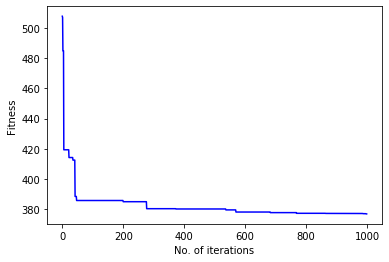

In [103]:
plt.plot(x1,egwo[2].convergence,color="blue")
plt.xlabel("No. of iterations")
plt.ylabel("Fitness")
plt.savefig("enhanced_F1.png")
plt.show()